In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import os
from collections import Counter
import numpy as np
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words('english'))
os.makedirs('outputs', exist_ok=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pandas as pd
import psycopg2

conn = psycopg2.connect(
    dbname="bank_reviews",
    user="postgres",
    password="Wakgari@123",  
    host="localhost",
    port="5432"
)

query = """
SELECT 
    b.bank_name,
    r.review_text,
    r.rating,
    r.review_date,
    r.sentiment_label,
    r.source
FROM reviews r
JOIN banks b ON r.bank_id = b.bank_id;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df.head())
print(df.shape)


                     bank_name  \
0  Commercial Bank of Ethiopia   
1  Commercial Bank of Ethiopia   
2  Commercial Bank of Ethiopia   
3  Commercial Bank of Ethiopia   
4  Commercial Bank of Ethiopia   

                                         review_text  rating review_date  \
0                   maaliif daddafee install gaafata       3  2025-11-28   
1                                           good app       5  2025-11-28   
2  application important advantage transfer money...       5  2025-11-27   
3                                           work app       1  2025-11-27   
4                    app makes life easier thank cbe       5  2025-11-27   

  sentiment_label             source  
0         Neutral  Google Play Store  
1        Positive  Google Play Store  
2        Positive  Google Play Store  
3        Negative  Google Play Store  
4        Positive  Google Play Store  
(978, 6)


C:\Users\HP\AppData\Local\Temp\ipykernel_18852\4212806144.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
# Analyzing Positive Reviews by Bank
drivers = df[df["sentiment_label"] == "positive"] \
    .groupby("bank_name")["review_text"].count()

drivers

#this code block is to analyze the negative reviews by bank
pain_points = df[df["sentiment_label"] == "negative"] \
    .groupby("bank_name")["review_text"].count()

pain_points

#this compare bank average ratings
avg_rating = df.groupby("bank_name")["rating"].mean().sort_values(ascending=False)
avg_rating





bank_name
Commercial Bank of Ethiopia    3.981595
Name: rating, dtype: float64

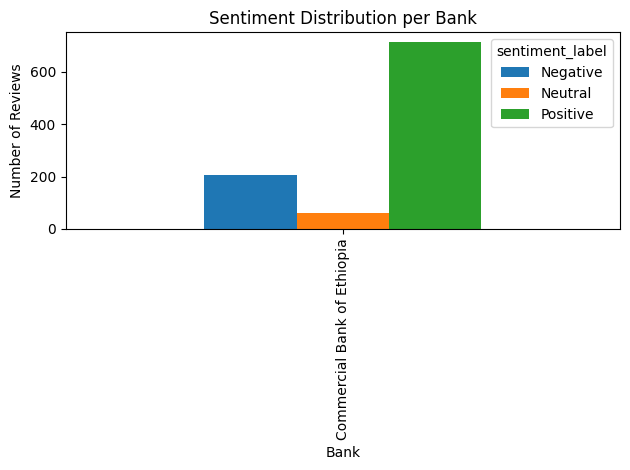

In [9]:
#visualize sentiment distribution per bank
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(["bank_name", "sentiment_label"]).size().unstack()

sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution per Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("outputs/sentiment_per_bank.png")
plt.show()


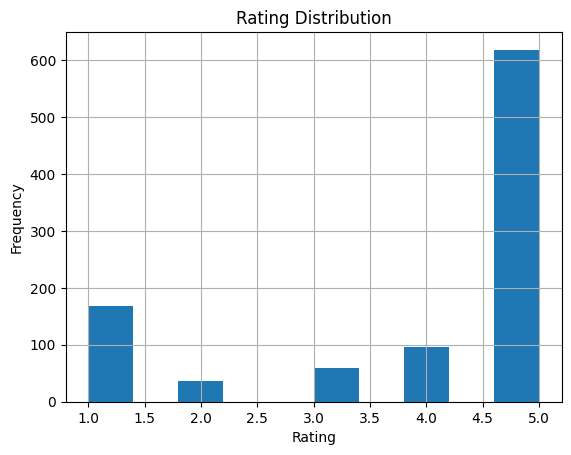

In [10]:
df["rating"].hist()
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.savefig("outputs/rating_distribution.png")
plt.show()


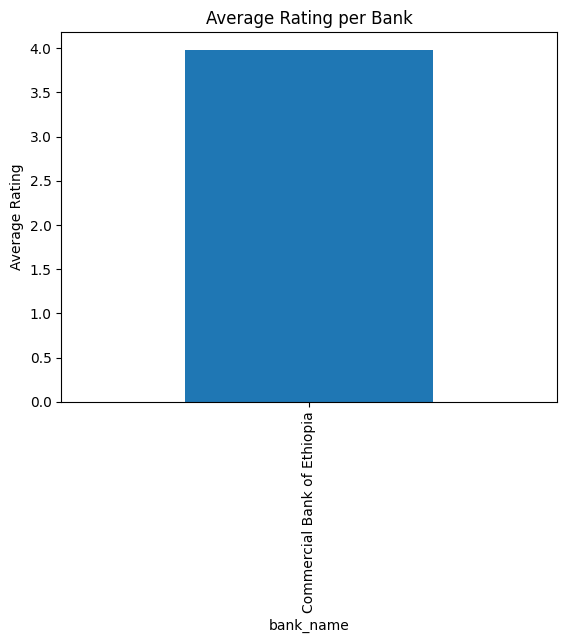

In [11]:
avg_rating.plot(kind="bar")
plt.title("Average Rating per Bank")
plt.ylabel("Average Rating")
plt.savefig("outputs/avg_rating_per_bank.png")
plt.show()


In [12]:
keywords = ["crash", "login", "bug", "error", "transfer"]

freq = df["review_text"].str.contains("|".join(keywords), case=False).sum()

print("Total keyword mentions:", freq)


Total keyword mentions: 48
